In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [75]:
df=pd.read_csv('insurance.csv')

In [76]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [77]:
df.shape

(1338, 7)

In [78]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [80]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [81]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

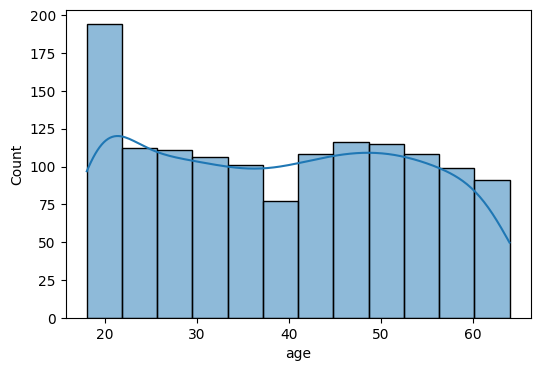

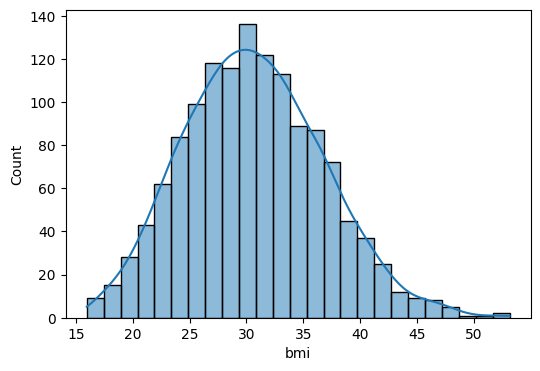

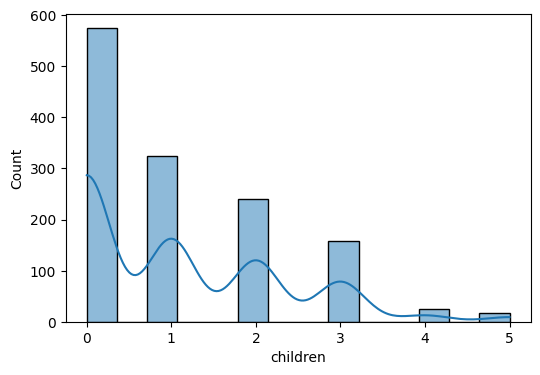

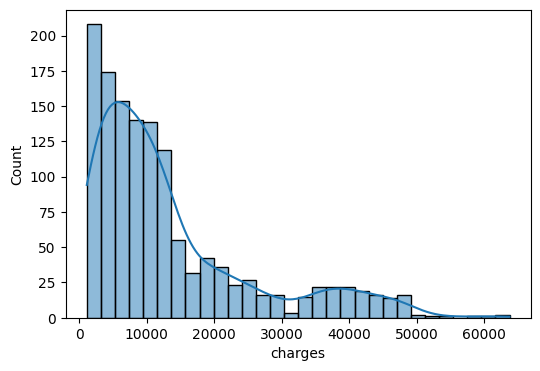

In [82]:
numberical_columns=['age','bmi', 'children','charges']
for cols in numberical_columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[cols],kde=True)

<Axes: xlabel='children', ylabel='count'>

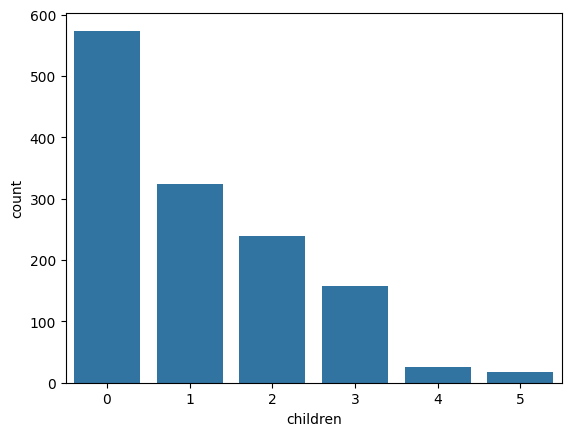

In [83]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

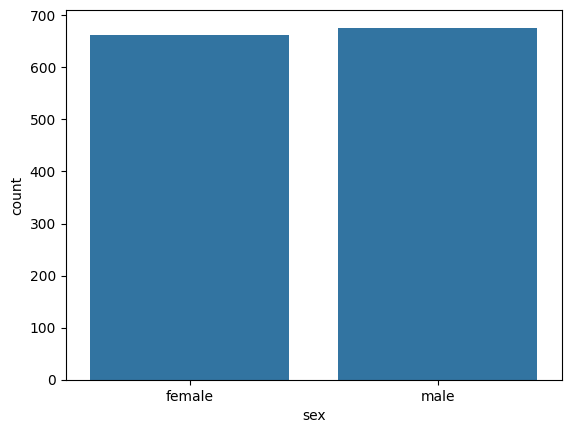

In [84]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

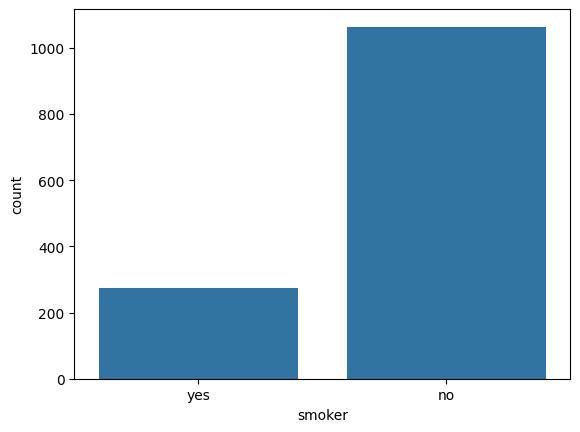

In [85]:
sns.countplot(x=df['smoker'])

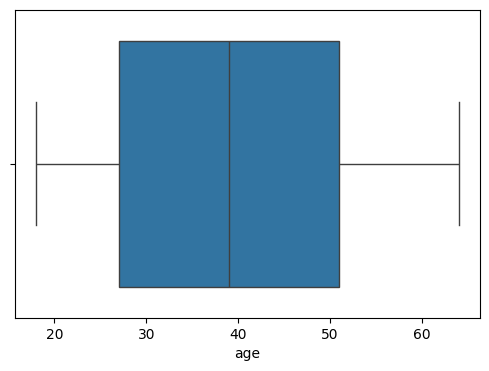

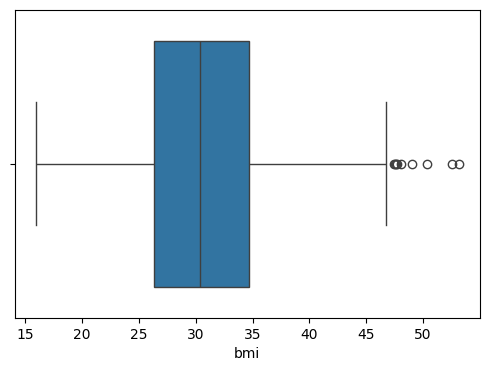

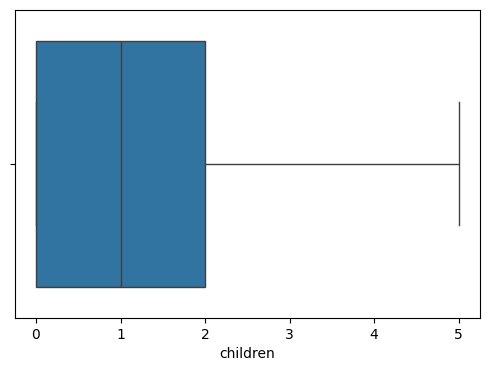

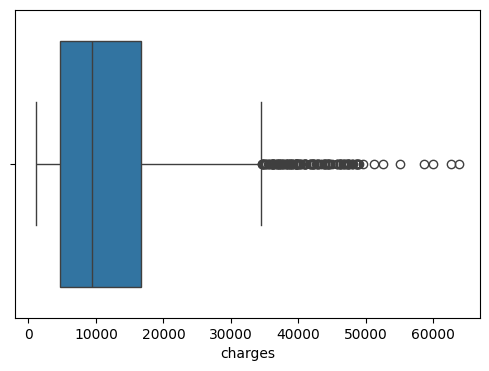

In [86]:
numberical_columns=['age','bmi', 'children','charges']
for cols in numberical_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[cols])

<Axes: >

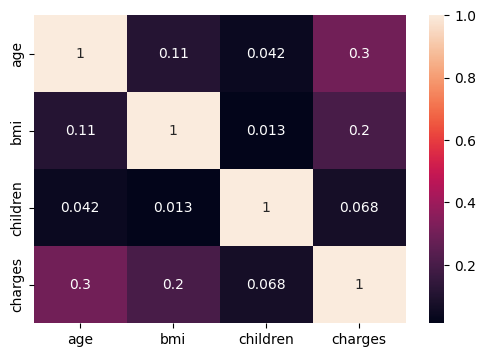

In [87]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [88]:
df_cleaned=df.copy()

In [89]:
df_cleaned.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [90]:
df_cleaned.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [91]:
df_cleaned['sex']=df_cleaned['sex'].map({"male":0,"female":1})

In [92]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [93]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [94]:
df_cleaned['smoker']=df_cleaned['smoker'].map({"yes":1,"no":0})

In [95]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [96]:
df_cleaned.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker'
},inplace=True)

In [97]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [98]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [99]:
df_cleaned.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


In [100]:
df_cleaned['bmi_category']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['underweight','normal','overweight','obese']
)

In [101]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,obese
2,28,0,33.000,3,0,4449.46200,False,True,False,obese
3,33,0,22.705,0,0,21984.47061,True,False,False,normal
4,32,0,28.880,0,0,3866.85520,True,False,False,overweight


In [102]:
df_cleaned['bmi_category'].value_counts()

,count
bmi_category,
obese,716
overweight,380
normal,221
underweight,21


In [103]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)

In [104]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27.900,0,1,16884.92400,False,False,True,False,True,False
1,18,0,33.770,1,0,1725.55230,False,True,False,False,False,True
2,28,0,33.000,3,0,4449.46200,False,True,False,False,False,True
3,33,0,22.705,0,0,21984.47061,True,False,False,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False,False,False,True
1334,18,1,31.920,0,0,2205.98080,False,False,False,False,False,True
1335,18,1,36.850,0,0,1629.83350,False,True,False,False,False,True
1336,21,1,25.800,0,0,2007.94500,False,False,True,False,True,False


In [105]:
df_cleaned=df_cleaned.astype(int)

In [106]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [107]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=['age','bmi','children']
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [108]:
df_cleaned.head(
)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0,1,0,1,0
1,-1.509965,0,0.462657,-0.078767,0,1725,0,1,0,0,0,1
2,-0.797954,0,0.462657,1.580926,0,4449,0,1,0,0,0,1
3,-0.441948,0,-1.335438,-0.908614,0,21984,1,0,0,1,0,0
4,-0.513149,0,-0.354659,-0.908614,0,3866,1,0,0,0,1,0


In [110]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_obese','region_northwest']]

In [111]:
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_obese,region_northwest
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0,0
1,-1.509965,0,0.462657,-0.078767,0,1725,1,1,0
2,-0.797954,0,0.462657,1.580926,0,4449,1,1,0
3,-0.441948,0,-1.335438,-0.908614,0,21984,0,0,1
4,-0.513149,0,-0.354659,-0.908614,0,3866,0,0,1


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X = final_df.drop(columns="charges")


In [114]:
X


,age,is_female,bmi,children,is_smoker,region_southeast,bmi_category_obese,region_northwest
0,-1.438764,1,-0.518122,-0.908614,1,0,0,0
1,-1.509965,0,0.462657,-0.078767,0,1,1,0
2,-0.797954,0,0.462657,1.580926,0,1,1,0
3,-0.441948,0,-1.335438,-0.908614,0,0,0,1
4,-0.513149,0,-0.354659,-0.908614,0,0,0,1
...,...,...,...,...,...,...,...,...
1333,0.768473,0,-0.027733,1.580926,0,0,1,1
1334,-1.509965,1,0.135731,-0.908614,0,0,1,0
1335,-1.509965,1,0.953046,-0.908614,0,1,1,0
1336,-1.296362,1,-0.845048,-0.908614,0,0,0,0


In [115]:
Y=final_df["charges"]

In [116]:
Y

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [117]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=4)

In [118]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [119]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 38014025.683797166
RMSE: 6165.551531193067
R²: 0.7052166043894207


In [121]:
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1 - ((1- r2) * (n-1) / (n - p - 1))
adjusted_r2

0.6961113257605225